In [1]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("data/boston.csv", header=0)

print(df.describe())

E:\python\python_install\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [2]:
df = df.values
df = np.array(df)
print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [3]:
for i in range(12):
    df[:,i] = df[:,i] / (df[:,i].max() - df[:,i].min())
    
x_data = df[:,:-1]
y_data = df[:,12]
print("Xshape:", x_data.shape, x_data)
print("Yshape:", y_data.shape, y_data)

Xshape: (506, 12) [[7.10352762e-05 1.80000000e-01 8.46774194e-02 ... 5.64885496e-01
  1.62765957e+00 1.37417219e-01]
 [3.06957815e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 2.52207506e-01]
 [3.06733020e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 1.11203091e-01]
 ...
 [6.82927750e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.55629139e-01]
 [1.23176518e-03 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.78807947e-01]
 [5.32876969e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 2.17439294e-01]]
Yshape: (506,) [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 2

In [4]:
x = tf.placeholder(tf.float32, [None, 12], name = "X")
y = tf.placeholder(tf.float32, [None, 1], name="Y")

with tf.name_scope("Model"):
    w = tf.Variable(tf.random_normal([12,1], stddev=0.01), name="W")
    b = tf.Variable(1.0, name="b")
    def model(x, w, b):
        return tf.matmul(x, w) + b
    pred = model(x, w, b)

In [5]:
train_epochs = 50
learning_rate = 0.01

with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2))

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [7]:
sess = tf.Session()
init = tf.global_variables_initializer()

logdir = '.\log'

In [8]:
sum_loss_op = tf.summary.scalar("loss", loss_function)

merged = tf.summary.merge_all()

sess.run(init)

writer = tf.summary.FileWriter(logdir, sess.graph)

In [10]:
loss_list = []

for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data ,y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        _, summary_str, loss = sess.run([optimizer,sum_loss_op, loss_function], feed_dict={x:xs, y:ys})
        writer.add_summary(summary_str, epoch)
        loss_sum = loss_sum + loss
    xvalues, yvalues = shuffle(x_data, y_data)
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    
    loss_average = loss_sum/len(y_data)
    loss_list.append(loss_average)
    print("epoch=", epoch+1,"loss=", loss_average, "b=", b0temp, "w=", w0temp)

epoch= 1 loss= 43.17428368303685 b= 3.6318855 w= [[-0.6092452 ]
 [ 1.4222347 ]
 [-0.8356641 ]
 [ 0.5142814 ]
 [ 2.5729396 ]
 [ 7.181101  ]
 [-0.04931032]
 [ 0.76823574]
 [ 0.33332324]
 [ 0.35278267]
 [ 2.2794826 ]
 [-4.429437  ]]
epoch= 2 loss= 31.997287309876146 b= 4.018411 w= [[-1.1589907 ]
 [ 1.9938453 ]
 [-1.5600495 ]
 [ 0.86467457]
 [ 2.9419966 ]
 [10.611479  ]
 [-0.8170977 ]
 [ 0.32783538]
 [ 0.5854321 ]
 [-0.24024415]
 [ 1.1239485 ]
 [-8.140956  ]]
epoch= 3 loss= 27.320971403808265 b= 4.2983193 w= [[ -1.6570432 ]
 [  2.203083  ]
 [ -2.005736  ]
 [  1.0713108 ]
 [  3.2168465 ]
 [ 13.202828  ]
 [ -1.1945945 ]
 [ -0.2045458 ]
 [  0.89469105]
 [ -0.74308217]
 [  0.19844931]
 [-10.993665  ]]
epoch= 4 loss= 24.664142070847678 b= 4.518933 w= [[ -2.1145988 ]
 [  2.223882  ]
 [ -2.279179  ]
 [  1.1639547 ]
 [  3.3952796 ]
 [ 15.189523  ]
 [ -1.357799  ]
 [ -0.74750656]
 [  1.22116   ]
 [ -1.1765213 ]
 [ -0.530527  ]
 [-13.212154  ]]
epoch= 5 loss= 23.102346412505888 b= 4.707199 w= [[ -2.

epoch= 36 loss= 19.887436086285565 b= 9.939292 w= [[ -8.975883  ]
 [  1.705784  ]
 [ -1.3832003 ]
 [  0.12404454]
 [ -0.82482773]
 [ 22.864376  ]
 [ -0.7285068 ]
 [ -6.4622793 ]
 [  5.658945  ]
 [ -5.2533703 ]
 [ -2.8821697 ]
 [-20.704782  ]]
epoch= 37 loss= 19.866759328891817 b= 10.104839 w= [[ -9.070041  ]
 [  1.7177298 ]
 [ -1.3543652 ]
 [  0.1181841 ]
 [ -0.92712736]
 [ 22.868977  ]
 [ -0.73104686]
 [ -6.5334635 ]
 [  5.703463  ]
 [ -5.2972455 ]
 [ -2.8964653 ]
 [-20.672646  ]]
epoch= 38 loss= 19.846729939961566 b= 10.269415 w= [[ -9.160213  ]
 [  1.7290841 ]
 [ -1.3269433 ]
 [  0.11276402]
 [ -1.0267291 ]
 [ 22.872612  ]
 [ -0.73385006]
 [ -6.6028366 ]
 [  5.745728  ]
 [ -5.33975   ]
 [ -2.9112217 ]
 [-20.641327  ]]
epoch= 39 loss= 19.82731382790703 b= 10.432977 w= [[ -9.246567  ]
 [  1.7398623 ]
 [ -1.3008776 ]
 [  0.10775297]
 [ -1.1237575 ]
 [ 22.87531   ]
 [ -0.7368617 ]
 [ -6.6704664 ]
 [  5.7858753 ]
 [ -5.3809423 ]
 [ -2.9263783 ]
 [-20.610878  ]]
epoch= 40 loss= 19.8084995

<IPython.core.display.Javascript object>


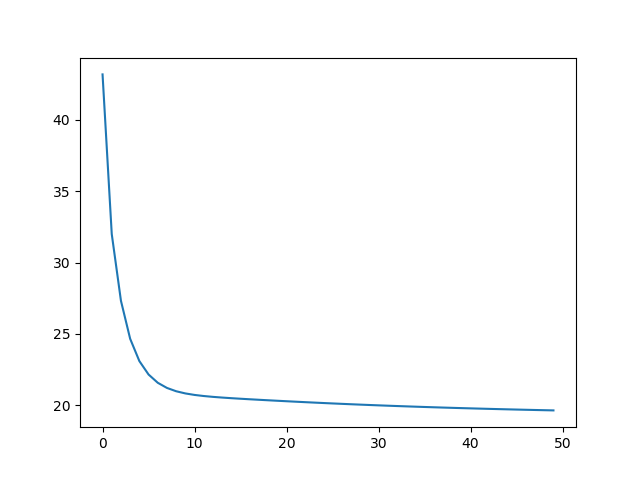

预测值：29.505600
标签值：34.900000


In [11]:
plt.plot(loss_list)
n = np.random.randint(506)
x_test = x_data[n]

x_test = x_test.reshape(1,12)
predict = sess.run(pred, feed_dict = {x:x_test})

print("预测值：%f" % predict)
print("标签值：%f" % y_data[n])